# sklearn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly  = PolynomialFeatures(degree=2) # degree表示最多添加几次幂，及多项式最多是几阶的

In [5]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [6]:
X2 = poly.transform(X) # 把数据转换为多次幂特征

In [7]:
X2[:5, :] # 第一列全为1，是X的0次方的意思

array([[ 1.        , -0.9553743 ,  0.91274005],
       [ 1.        , -0.74769459,  0.5590472 ],
       [ 1.        ,  2.47165582,  6.1090825 ],
       [ 1.        ,  0.88061138,  0.7754764 ],
       [ 1.        , -2.51402981,  6.32034587]])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

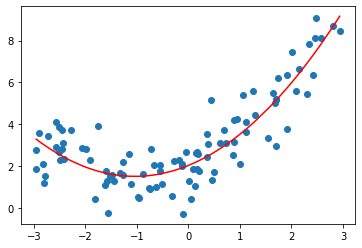

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r') # x排序了，y_predict2是一个x对应一个y,y应该按照x的索引顺序取值，所以要取x地argsort
plt.show()

In [10]:
lin_reg2.coef_

array([0.        , 1.0045632 , 0.48325968])

In [11]:
lin_reg2.intercept_

2.041679502807576

## 关于PolynomialFeatures

> PolynomialFeatures当幂数上升的时候回导致X的列数快速上升

In [12]:
X = np.arange(1, 11).reshape(-1, 2) # 10个数据调整为两列

In [13]:
X.shape

(5, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2 # PolynomialFeatures当幂数上升的时候回导致X的列数快速上升,会生成三个二次幂(X1的平方、X1*X2、X2的平方)

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [17]:
X2.shape

(5, 6)

> PolynomialFeatures当幂数上升的时候回导致X的列数快速上升
![PolynomialFeatures当幂数上升时导致X在transform后列数快速上升](images/PolynomialFeatures当幂数上升时导致X在transform后列数快速上升.png)

## 使用sklearn中的Pipeline来完成多项式回归

In [18]:
'''重要'''
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline可以把我们的多个步骤合并到一起
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [19]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

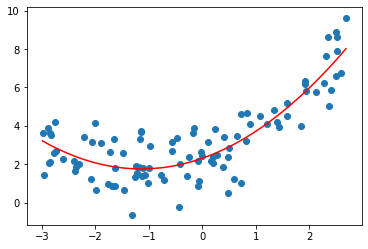

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [22]:
poly_reg.score(X, y)

0.7417706598382324